In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)

In [3]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
count_classes=pd.value_counts(data['Class'])
count_classes

0    284315
1       492
Name: Class, dtype: int64

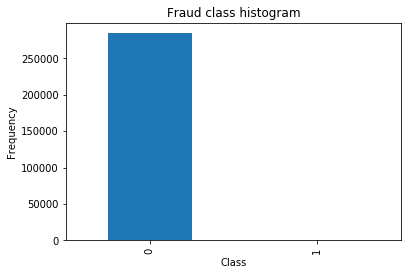

In [6]:

count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [7]:
# 计算训练集的平均值和标准差
from sklearn.preprocessing import StandardScaler
print(type(data['Amount']))

<class 'pandas.core.series.Series'>


In [8]:
data_amount=np.array(data['Amount']).reshape(-1,1)
data['normAmount']=StandardScaler().fit_transform(data_amount)

In [9]:
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
# ix类似于loc(),参数是标签值，而iloc参数是索引值

x=data.ix[:,data.columns !="Class"]
y=data.ix[:,data.columns =="Class"]
print(x)
print(y)

               V1         V2        V3        V4        V5        V6        V7        V8        V9       V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28  normAmount
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053    0.244964
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   -0.342475
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.51465

/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tarena/.local/lib/python3.6/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pan

## 下采样

In [11]:
# data["Class"]取值为0 或者1

In [12]:
# data[data["Class"]==1]

In [13]:
# 异常样本索引
fraud_indices=np.array(data[data["Class"]==1].index)
print(fraud_indices)
print(len(fraud_indices))
# 异常样本索引
normal_indices=np.array(data[data["Class"]==0].index)
print(normal_indices)
print(len(normal_indices))

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  43773  44001  44091  44223  44270
  4455

In [14]:
# 从正常样本中选择与异常样本数量相同的样本（用正常样本替换异常样本）
random_normal_indices=np.random.choice(normal_indices,len(fraud_indices),replace=False)
type(random_normal_indices)
# len(random_normal_indices) #492

numpy.ndarray

In [15]:
# 合并两个样本(异常样本，随即选择样本)
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
len(under_sample_indices)

984

In [16]:
under_sample_data=data.iloc[under_sample_indices,:]
len(under_sample_data)

984

In [17]:
X_undersample=under_sample_data.ix[:,under_sample_data.columns!="Class"]
print(X_undersample)
y_undersample=under_sample_data.ix[:,under_sample_data.columns=="Class"]     
print(y_undersample)

/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


               V1         V2         V3         V4         V5         V6         V7         V8         V9        V10        V11        V12       V13        V14       V15        V16        V17       V18       V19        V20        V21       V22        V23       V24       V25       V26       V27       V28  normAmount
541     -2.312227   1.951992  -1.609851   3.997906  -0.522188  -1.426545  -2.537387   1.391657  -2.770089  -2.772272   3.202033  -2.899907 -0.595222  -4.289254  0.389724  -1.140747  -2.830056 -0.016822  0.416956   0.126911   0.517232 -0.035049  -0.465211  0.320198  0.044519  0.177840  0.261145 -0.143276   -0.353229
623     -3.043541  -3.157307   1.088463   2.288644   1.359805  -1.064823   0.325574  -0.067794  -0.270953  -0.838587  -0.414575  -0.503141  0.676502  -1.692029  2.000635   0.666780   0.599717  1.725321  0.283345   2.102339   0.661696  0.435477   1.375966 -0.293803  0.279798 -0.145362 -0.252773  0.035764    1.761758
4920    -2.303350   1.759247  -0.359745   2.33024

/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
print("Precentage of normal transactions:",len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))

Precentage of normal transactions: 0.5


In [19]:
print("Precentage of fraud transactions:",len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))

Precentage of fraud transactions: 0.5


In [20]:
len(under_sample_data)

984

In [21]:
from sklearn.model_selection import train_test_split  # 交叉验证，训练集和测试集划分
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
len(X_train),len(X_test),len(X_train)+len(X_test)

(199364, 85443, 284807)

In [23]:
# 下采样数据集合
X_train_undersample,X_test_undersample,Y_train_undersample,Y_test_undersample=train_test_split(X_undersample,y_undersample,test_size=0.3,random_state=0)

In [24]:
len(X_train_undersample),len(X_test_undersample)

(688, 296)

In [25]:
len(Y_train_undersample),len(Y_test_undersample)

(688, 296)

In [26]:
from sklearn.linear_model import LogisticRegression
# K折交叉验证器，cross_val_score验证某个模型在某个训练集上的稳定性
from sklearn.model_selection import KFold,cross_val_score 
# 评估训练结果误差
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [27]:
c_param_range=[0.01,0.1,1,10,100]
results_table=pd.DataFrame(index=range(len(c_param_range),2),columns=["C_parameter","Mean recall score"])
results_table["C_parameter"]=c_param_range
results_table

,C_parameter,Mean recall score
0,0.01,NaN
1,0.10,NaN
2,1.00,NaN
3,10.00,NaN
4,100.00,NaN


In [28]:
fold=KFold(5)
# split是KFold下的一个方法，
fold_data=fold.split(X_train_undersample,Y_train_undersample)
# fold_data=fold.split(X_train_undersample)
# fold_data=fold.split(Y_train_undersample)

for index, data1 in enumerate(fold_data):# 分成5组，
    print("index:\n", index)# 返回的是5组数据索引
    print("data:\n", data)# 返回的是训练集和测试集的索引

index:
 0
data:
                V1         V2        V3        V4        V5        V6        V7        V8        V9       V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28  Class  normAmount
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0    0.244964
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0   -0.342475
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198 

In [29]:
data1[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [30]:
tr=X_train_undersample.iloc[data1[0],:] # 返回的是对应索引值位置上的标签
tr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
6870,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,-6.999907,6.316210,-8.670818,0.316024,-7.417712,-0.436537,-3.652802,-6.293145,-1.243248,0.364810,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,-0.349231
4247,1.442561,-0.615738,-0.891180,-1.633663,1.479310,3.267070,-1.198687,0.715892,0.362621,0.291951,1.009214,-3.174217,1.865372,1.407701,0.257173,1.530792,0.445434,-0.870203,0.773397,0.178614,-0.291036,-0.887000,0.100046,0.918927,0.364862,-0.506106,-0.015899,0.011726,-0.270749
271694,0.039988,0.767051,0.237484,-0.597232,0.363374,-1.030981,0.910489,-0.106734,0.146508,-0.382494,-1.150251,-0.523596,-1.218831,0.359963,-0.215032,-0.073356,-0.307072,-0.662765,-0.120776,-0.122959,-0.273768,-0.662030,0.081476,-0.124516,-0.536969,0.151947,0.242324,0.093456,-0.342475
214775,-0.395582,-0.751792,-1.984666,-0.203459,1.903967,-1.430289,-0.076548,-0.992260,0.756307,0.217630,0.253931,-0.075707,-2.215525,1.065262,-0.775503,-0.911031,-0.223768,0.768370,0.477521,-1.027716,1.377515,2.151787,0.189225,0.772943,-0.872443,-0.200612,0.356856,0.032113,-0.350471
149145,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,0.369936,0.382172,-2.262933,1.210605,-1.880619,-0.934160,0.235477,3.321569,1.906271,-0.581356,-2.140874,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,-0.325283
15781,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,4.783257,-6.699252,0.846768,-6.576276,-0.062330,-5.961660,-12.218482,-4.791842,0.894854,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,0.046539
11710,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,-13.261652,10.063790,-14.394767,0.654889,-14.248316,-0.305361,-8.161632,-12.280965,-4.818586,0.719788,0.996469,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,-0.349231
177709,-1.603513,-1.387310,0.294931,0.454584,2.991517,0.312287,-0.346436,0.550158,-0.394950,-0.391954,0.565225,0.799081,0.014841,0.428695,-0.225725,-0.715608,-0.178730,-0.433201,-1.262752,0.377241,0.629870,1.358134,0.048252,-1.617574,0.623597,-0.198753,-0.033866,-0.012039,-0.032183
179852,1.522319,-2.620740,0.162082,-0.413442,-2.017811,1.461869,-1.975232,0.593168,1.590390,0.443273,-0.732289,-0.239128,-1.242703,-1.245029,-2.236384,1.171542,0.347289,-0.189317,1.314764,0.465669,0.448753,1.026305,-0.144135,0.248102,-0.329750,-0.023030,0.024540,0.003180,0.782227
3491,-0.473431,-0.225558,1.312526,-1.693033,-0.555542,-0.365208,0.277984,0.113147,-1.133042,0.060312,0.420663,-0.949274,-1.581482,0.024481,-1.205684,1.293737,-0.012736,-0.767432,0.721801,0.122189,0.146233,0.124281,0.041162,-0.040501,-0.209422,-0.493393,0.077010,0.125305,-0.026466


In [31]:
len(tr)

551

In [32]:
len(Y_train_undersample.iloc[data1[0],:].values.ravel()) # 551
Y_train_undersample.iloc[data1[0],:]

,Class
6870,1
4247,0
271694,0
214775,1
149145,1
15781,1
11710,1
177709,0
179852,0
3491,0


In [33]:
Y_train_undersample.iloc[data1[0],:].values.ravel()

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [34]:
X_train_undersample.iloc[data1[1],:].values

array([[ 7.53356012e-01,  2.28498795e+00, -5.16449200e+00, ...,
         2.96145453e-01, -4.71736660e-02, -3.45233221e-01],
       [-1.49703457e+01,  8.40142101e+00, -1.68672385e+01, ...,
        -1.62138569e+00, -1.10481921e+00,  7.38288119e-01],
       [-1.46898307e+00, -1.87840579e+00,  1.41261313e+00, ...,
        -1.70203139e-03, -3.50484368e-02,  8.20368828e-01],
       ...,
       [-3.60495961e-01,  8.29090852e-01,  5.74493321e-01, ...,
         1.28209367e-01, -1.57636299e-01, -3.19285641e-01],
       [ 1.95011164e+00, -2.06816228e-01, -1.18355329e+00, ...,
        -8.00817516e-02, -5.17927138e-02, -1.10745465e-01],
       [-3.26224147e-01,  1.10363090e+00,  6.32739657e-01, ...,
        -5.85517501e-02, -1.73621626e-02, -1.82071323e-01]])

In [35]:
def printing_Kflod_scores(x_train_data,y_train_data):
    fold=KFold(5)
#    # fold_data=fold.split(x_train_data,y_train_data)
#     print(fold_data)
    c_param_range=[0.01,0.1,1,10,100]
    results_table=pd.DataFrame(index=range(len(c_param_range),2),columns=["C_parameter","Mean recall score"])
    results_table["C_parameter"]=c_param_range
    
    j=0
    for c_param in c_param_range:
        print("C parameter:",c_param)
        
        recall_accs=[]
        
         # enumerate返回数据索引值和数据所构成的元组组成的列表
        for iteration,indices in enumerate(fold.split(x_train_data,y_train_data),start=1):
            
            lr=LogisticRegression(C=c_param,penalty="l1")# 绝对值之和
            
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            
            y_pred_undersample=lr.predict(x_train_data.iloc[indices[1],:].values)
            
            # recall_score预测值与原始样本结果不同的数量与结果相同数量的比值
            recall_acc=recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            
            recall_accs.append(recall_acc)
            
            print(iteration,recall_acc)
            
        results_table.ix[j,'Mean recall score']=np.mean(recall_acc)
        j+=1
        print(np.mean(recall_accs))
    best_c=results_table.loc[np.array(results_table['Mean recall score']).argmax()]["C_parameter"]
    print("best_C",best_c)
    return best_c

In [36]:
best_c=printing_Kflod_scores(X_train_undersample,Y_train_undersample)

C parameter: 0.01
1 0.9315068493150684
2 0.9178082191780822
3 0.9830508474576272
4 0.9594594594594594
5 0.9545454545454546
0.9492741659911385
C parameter: 0.1
1 0.8493150684931506
2 0.863013698630137
3 0.9491525423728814
4 0.918918918918919
5 0.9090909090909091
0.8978982275011994
C parameter: 1
1 0.8493150684931506


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

2 0.8767123287671232
3 0.9661016949152542
4 0.9459459459459459
5 0.9090909090909091
0.9094331894424765
C parameter: 10
1 0.8493150684931506
2 0.8767123287671232
3 0.9830508474576272


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linea

4 0.9459459459459459
5 0.9242424242424242
0.9158533229812542
C parameter: 100
1 0.8493150684931506


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2 0.8904109589041096
3 0.9830508474576272


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.9459459459459459
5 0.9242424242424242
0.9185930490086515
best_C 0.01


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [37]:
import itertools  # 自带了三个可以无限迭代的迭代器

In [38]:
def plot_confusion_matrix(cm,classes,title="Confusion matrix",cmap=plt.cm.jet):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)  # imshow(可以显示图片，同时也显示其格式)。show(只显示图片，不显示格式)
    plt.title(title)
    plt.colorbar()  # 颜色条
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)# rotation代表x轴标签的旋转角度
    plt.yticks(tick_marks,classes)
    
    thresh=cm.max()/2.
    # product返回A，B的元素的笛卡尔积的元组
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        # 添加数据标签，j,i表示数据标签的位置，cm[i,j]表示数据值，
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='green' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.xlabel("True label")
    plt.ylabel('Predicted label')

In [39]:
lr=LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train_undersample,Y_train_undersample.values.ravel())
y_pred_undersample=lr.predict(X_test_undersample.values)
y_pred_undersample

/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [40]:
cnf_matrix=confusion_matrix(Y_test_undersample,y_pred_undersample)  # 混淆矩阵（注意与召回率，精确率结合）
cnf_matrix

array([[130,  19],
       [ 12, 135]])

In [41]:
np.set_printoptions(precision=2)  # 输出结果浮点精度为2
print(cnf_matrix[1,0],cnf_matrix[1,1])
print("Recall metric in the testing fataset:",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

12 135
Recall metric in the testing fataset: 0.9183673469387755


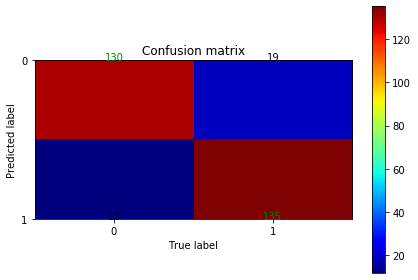

In [42]:
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

## 拿到数据不处理就开始给机器学习

In [43]:
best_c=printing_Kflod_scores(X_train,Y_train)

C parameter: 0.01


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.4925373134328358


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2 0.6027397260273972


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3 0.6833333333333333


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.5692307692307692


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 0.45
0.5595682284048672
C parameter: 0.1


/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5671641791044776


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2 0.6164383561643836


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3 0.6833333333333333


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.5846153846153846


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 0.525
0.5953102506435158
C parameter: 1


/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5522388059701493


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2 0.6164383561643836


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3 0.7166666666666667


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.6153846153846154


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 0.5625
0.612645688837163
C parameter: 10


/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5522388059701493


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2 0.6164383561643836


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3 0.7333333333333333


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.6153846153846154


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 0.575
0.6184790221704963
C parameter: 100


/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5522388059701493


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2 0.6164383561643836


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3 0.7333333333333333


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.6153846153846154


/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 0.575
0.6184790221704963
best_C 10.0


/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [44]:
lr=LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train,Y_train.values.ravel())
y_pred=lr.predict(X_test.values)

/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
cnf_matrix=confusion_matrix(Y_test,y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[85284,    12],
       [   56,    91]])

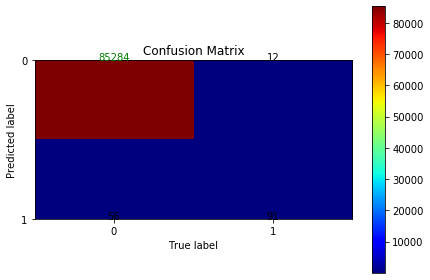

In [46]:
class_name=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_name,title='Confusion Matrix')
plt.show()

In [47]:
lr=LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train_undersample,Y_train_undersample.values.ravel())
y_pred_undersample_proba=lr.predict_proba(X_test_undersample.values)# 预测概率值

/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [49]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

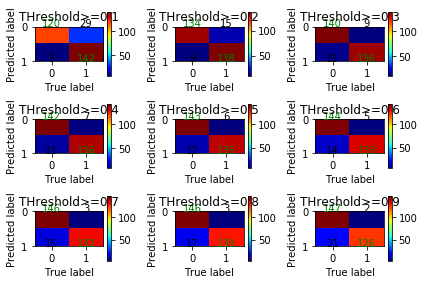

In [50]:
j=1
for i in thresholds:
    y_test_predict_high_recall=y_pred_undersample_proba[:,1]>i
    plt.subplot(3,3,j)
    j+=1
    
    cnf_matrix=confusion_matrix(Y_test_undersample,y_test_predict_high_recall)
    np.set_printoptions(precision=2)
    class_name=[0,1]
    plot_confusion_matrix(cnf_matrix,class_name,title='THreshold>=%s'%i)

## 过采样

In [51]:
import pandas as pd
import sklearn.metrics as sm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
credit_cards=pd.read_csv('creditcard.csv')

In [52]:
columns=credit_cards.columns
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'], dtype='object')

In [53]:
features_colunms=columns.delete(len(columns)-1)
features_colunms

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], dtype='object')

In [54]:
features=credit_cards[features_colunms]
labels=credit_cards['Class']

In [55]:
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=0)

In [ ]:
oversample=SMOTE(random_state=0)
os_features,os_labels=oversample.fit_sample(features_train,labels_train)

In [ ]:
len(os_labels[os_labels==1])
os_features=pd.DataFrame(os_features)
os_labels=pd.DataFrame(os_labels)
best_c=printing_Kflod_scores(os_features,os_labels)

In [ ]:
lr=LogisticRegression(C=best_c,penalty='l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred=lr.predict(features_test.values)

In [ ]:
cnf_matrix=confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

In [ ]:
class_name=[0,1]
plt.figure()
plot_confusion_martix(cnf_matrix,classes=class_name,title='Confusion Matrix')
plt.show()